In [1]:
import os
os.chdir('/home/featurize/work/Image_Website/ethanYaoyx-Image_Generation_for_Medical_Application_Dog_hip/mmpose')

In [2]:
import cv2
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import pandas as pd

import torch

import mmcv
from mmcv import imread
import mmengine
from mmengine.registry import init_default_scope

from mmpose.apis import inference_topdown
from mmpose.apis import init_model as init_pose_estimator
from mmpose.evaluation.functional import nms
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples
import matplotlib.patches as patches

from mmdet.apis import inference_detector, init_detector

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


In [4]:
detector = init_detector(
    '/home/featurize/work/Image_Website/ethanYaoyx-Image_Generation_for_Medical_Application_Dog_hip/mmdetection/data/rtmdet_m_dog_hip_all.py',
    
    '/home/featurize/work/Image_Website/ethanYaoyx-Image_Generation_for_Medical_Application_Dog_hip/mmdetection/checkpoint/rtmdet_m_dog_hip_287-55485ded.pth',
    device=device
)

Loads checkpoint by local backend from path: /home/featurize/work/Image_Website/ethanYaoyx-Image_Generation_for_Medical_Application_Dog_hip/mmdetection/checkpoint/rtmdet_m_dog_hip_287-55485ded.pth


In [5]:
img_path = '/home/featurize/work/Dataset2/data/July_2024/138477.jpg'
init_default_scope(detector.cfg.get('default_scope', 'mmdet'))

detect_result = inference_detector(detector, img_path)

/environment/miniconda3/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
detect_result.keys()

['ignored_instances', 'pred_instances', 'gt_instances']

In [7]:
labels =detect_result.pred_instances.labels
labels

tensor([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [8]:
print(dir(detect_result.pred_instances))

['__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_data_fields', '_metainfo_fields', 'all_items', 'all_keys', 'all_values', 'bboxes', 'cat', 'clone', 'cpu', 'cuda', 'detach', 'get', 'items', 'keys', 'labels', 'metainfo', 'metainfo_items', 'metainfo_keys', 'metainfo_values', 'mlu', 'musa', 'new', 'npu', 'numpy', 'pop', 'scores', 'set_data', 'set_field', 'set_metainfo', 'to', 'to_dict', 'to_tensor', 'update', 'values']


In [9]:
scores = detect_result.pred_instances.scores
scores 

tensor([0.8907, 0.8867, 0.8737, 0.8702, 0.0294, 0.0287, 0.0280, 0.0233, 0.0230,
        0.0224, 0.0221, 0.0208, 0.0204, 0.0200, 0.0195, 0.0193, 0.0193, 0.0192,
        0.0189, 0.0182, 0.0181, 0.0180, 0.0177, 0.0176, 0.0172, 0.0169, 0.0168,
        0.0167, 0.0164, 0.0164, 0.0163, 0.0162, 0.0161, 0.0160, 0.0160, 0.0160,
        0.0154, 0.0154, 0.0153, 0.0153, 0.0148, 0.0148, 0.0146, 0.0145, 0.0144,
        0.0143, 0.0142, 0.0142, 0.0140, 0.0139, 0.0139, 0.0136, 0.0133, 0.0132,
        0.0130, 0.0130, 0.0130, 0.0129, 0.0127, 0.0126, 0.0125, 0.0122, 0.0121,
        0.0121, 0.0120, 0.0120, 0.0119, 0.0118, 0.0118, 0.0118, 0.0118, 0.0118,
        0.0118, 0.0118, 0.0116, 0.0115, 0.0114, 0.0114, 0.0114, 0.0114, 0.0113,
        0.0113, 0.0112, 0.0112, 0.0112, 0.0111, 0.0111, 0.0111, 0.0111, 0.0110,
        0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0108, 0.0108, 0.0108,
        0.0108, 0.0107, 0.0105, 0.0105, 0.0105, 0.0104, 0.0104, 0.0103, 0.0101,
        0.0101, 0.0100, 0.0100, 0.0099, 

In [10]:
bboxes=detect_result.pred_instances.bboxes[:]
bboxes

tensor([[670.9723, 102.6737, 777.4457, 208.7479],
        [203.4628, 117.4417, 313.1943, 226.7877],
        [690.3491,  43.8762, 797.8333, 150.8404],
        ...,
        [103.2378,   0.0000, 228.7820,  18.5969],
        [ 82.3360, 181.3803, 108.6817, 215.5638],
        [670.5011, 157.0962, 734.7714, 208.8127]], device='cuda:0')

In [11]:
pose_estimator = init_pose_estimator(
    '/home/featurize/work/Image_Website/ethanYaoyx-Image_Generation_for_Medical_Application_Dog_hip/mmpose/data/rtmpose-m-Dog_hip_all.py',
    '/home/featurize/work/Image_Website/ethanYaoyx-Image_Generation_for_Medical_Application_Dog_hip/mmpose/checkpoint/all_m_best_PCK_epoch_5-eac12d89_20240725.pth',
    device=device,
    cfg_options={'model': {'test_cfg': {'output_heatmaps': False}}}
)

Loads checkpoint by local backend from path: /home/featurize/work/Image_Website/ethanYaoyx-Image_Generation_for_Medical_Application_Dog_hip/mmpose/checkpoint/all_m_best_PCK_epoch_5-eac12d89_20240725.pth


In [12]:
img_path = '/home/featurize/work/Dataset2/data/July_2024/138477.jpg'

In [13]:
init_default_scope(detector.cfg.get('default_scope', 'mmdet'))

05/13 04:51:55 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".


In [14]:
detect_result = inference_detector(detector, img_path)

In [15]:
detect_result.keys()

['ignored_instances', 'pred_instances', 'gt_instances']

In [18]:
## Predict
def predict_and_plot(image_path, detector, pose_estimator, conf_thres_center=0.39, conf_thres_head=0.46):
    print(f'Processing {image_path}')
    image = imread(image_path)

    colors = [
        (255, 0, 0),    # 红色
        (0, 255, 0),    # 绿色
        (0, 0, 255),    # 蓝色
        (255, 255, 0),  # 黄色
    ]

    init_default_scope(detector.cfg.get('default_scope', 'mmdet'))
    
    detect_result_all = inference_detector(detector, image_path)
    

    pred_instance_all = detect_result_all.pred_instances.cuda().numpy()
    bboxes_all = np.concatenate((pred_instance_all.bboxes, pred_instance_all.scores[:, None]), axis=1)
    bboxes_head = bboxes_all[np.logical_and(pred_instance_all.labels == 0, pred_instance_all.scores > conf_thres_head)]
    bboxes_center = bboxes_all[np.logical_and(pred_instance_all.labels == 1, pred_instance_all.scores > conf_thres_center)]
    bboxes_head = bboxes_head[nms(bboxes_head, 0.3)][:, :4].astype('int')
    bboxes_center = bboxes_center[nms(bboxes_center, 0.3)][:, :4].astype('int')
    
    # head
    if len(bboxes_head) > 0:
        pose_results_head = inference_topdown(pose_estimator, image_path, bboxes_head)
        
        try:
            data_samples_head = merge_data_samples(pose_results_head)
            head = data_samples_head.pred_instances.keypoints.astype('int')
            #print(f'head: {head}')
        except ValueError as e:
            print(f'Error merging data samples: {e}')
            

    # center   
    if len(bboxes_center) > 0:
        pose_results_center = inference_topdown(pose_estimator, image_path, bboxes_center)
        
        try:
            data_samples_center = merge_data_samples(pose_results_center)
            center = data_samples_center.pred_instances.keypoints.astype('int')
            #print(f'center: {center}')
        except ValueError as e:
            print(f'Error merging data samples: {e}')
            

    #####plot
    fig, ax = plt.subplots(figsize=(15, 15))  
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_aspect('equal', 'box')

    # 绘制中心关键点和矩形框、圆圈
    if len(bboxes_center) > 0:
        for idx, bbox in enumerate(bboxes_center):
            keypoint = center[idx]
            for x, y in keypoint:
                center_x = x
                center_y = y
                radius = max(bbox[2] - bbox[0], bbox[3] - bbox[1]) // 2
                circle = plt.Circle((center_x, center_y), radius, color='b', fill=False)
                ax.add_patch(circle)
                ax.plot(x, y, 'o', color=np.array(colors[0])/255.0, markersize=5)

    # 
    if len(bboxes_head) > 0:
        for idx, bbox in enumerate(bboxes_head):
            keypoint = head[idx]
            for x, y in keypoint:
                ax.plot(x, y, 'o', color=np.array(colors[1])/255.0, markersize=5)

    plt.axis('off')
    plt.show()

Processing /home/featurize/work/Dataset2/data/Testing/Images/361122.jpg


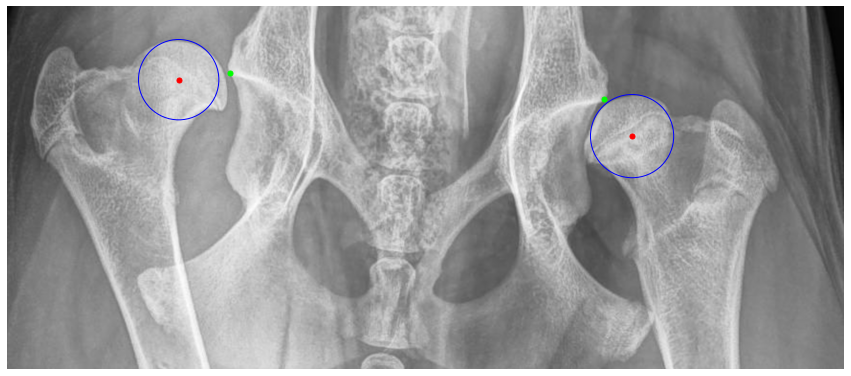

In [19]:
image_path = '/home/featurize/work/Dataset2/data/Testing/Images/361122.jpg'
predict_and_plot(image_path, detector, pose_estimator,  conf_thres_center=0.42, conf_thres_head=0.43)